<a href="https://colab.research.google.com/github/dalania/metereologia-aplicada/blob/main/mapa_metereologia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.formula.api as sm

# para gráficos
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# para a análise de dados espaciais
import geopandas as gp
import pysal as ps
import splot
import mapclassify as mc
from libpysal.weights import Queen
from libpysal import weights
from esda import Moran, Moran_Local, G_Local
from splot.esda import plot_moran, moran_scatterplot, lisa_cluster, plot_local_autocorrelation

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/dist-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.10.2-CAPI-1.16.0) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


In [2]:
from google.colab import drive
drive.mount('/content/drive/')
%cd /content/drive/MyDrive/

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
/content/drive/MyDrive


In [3]:
!pip install geopandas shapely mapclassify libpysal splot esda pysal
!pip install --upgrade pyshp
!pip install --upgrade descartes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
dados2020 = pd.read_csv('/content/drive/MyDrive/metereologia/tabela1612.csv', encoding='utf-8')
dados2019 = pd.read_csv('/content/drive/MyDrive/metereologia/tabela1612 (1).csv', encoding='utf-8')
dados2018 = pd.read_csv('/content/drive/MyDrive/metereologia/tabela1612.csv', encoding='utf-8')

link = '/content/drive/MyDrive/metereologia/RN_Municipios_2021.json'  
geodf = gp.read_file(link)   # ler shapefile

In [18]:
dados2019

,mun,Município,Área plantada (Hectares)
0,2400109,Acari (RN),245
1,2400208,Açu (RN),975
2,2400307,Afonso Bezerra (RN),1634
3,2400406,Água Nova (RN),341
4,2400505,Alexandria (RN),456
...,...,...,...
162,2414704,Várzea (RN),210
163,2414753,Venha-Ver (RN),1080
164,2414803,Vera Cruz (RN),1900
165,2414902,Viçosa (RN),464


In [14]:
# mesclar shapefile com dataframe usando a coluna mun
geodf.rename(columns={'CD_MUN': 'mun'}, inplace=True)  # mudar nome da coluna com cód. para 'mun'
dados2020
dados2019
dados2018
geodf

,mun,NM_MUN,SIGLA,AREA_KM2,geometry
0,2400109,Acari,RN,608.466,"POLYGON ((-36.60459 -6.29037, -36.61384 -6.293..."
1,2400208,Açu,RN,1303.442,"POLYGON ((-36.89753 -5.60348, -36.89782 -5.602..."
2,2400307,Afonso Bezerra,RN,576.179,"POLYGON ((-36.43987 -5.36988, -36.51500 -5.401..."
3,2400406,Água Nova,RN,50.684,"POLYGON ((-38.27755 -6.18104, -38.27878 -6.180..."
4,2400505,Alexandria,RN,381.205,"POLYGON ((-37.84320 -6.33309, -37.85330 -6.332..."
...,...,...,...,...,...
162,2414704,Várzea,RN,72.684,"POLYGON ((-35.34221 -6.31526, -35.34551 -6.315..."
163,2414753,Venha-Ver,RN,71.621,"POLYGON ((-38.57038 -6.29295, -38.57004 -6.294..."
164,2414803,Vera Cruz,RN,84.127,"POLYGON ((-35.36514 -6.05553, -35.36688 -6.054..."
165,2414902,Viçosa,RN,37.905,"POLYGON ((-37.92119 -5.95980, -37.95359 -5.955..."


In [25]:
geodf['mun'].astype(int)
dados2020['mun'].astype(int)
dados2019['mun'].astype(int)
dados2018['mun'].astype(int)

dados2020['Área plantada (Hectares)'].replace('...','0', inplace=True)
dados2018['Área plantada (Hectares)'].replace('...','0', inplace=True)
dados2019['Área plantada (Hectares)'].replace('...','0', inplace=True)

dados2020['Área plantada (Hectares)'].astype(int)
dados2019['Área plantada (Hectares)'].astype(int)
dados2018['Área plantada (Hectares)'].astype(int)



0       389
1      1766
2      1145
3       342
4       507
       ... 
162     180
163     799
164    1900
165     142
166     425
Name: Área plantada (Hectares), Length: 167, dtype: int64

In [34]:
dados2020['mun'] = dados2020['mun'].astype(int)
dados2020['mun'] = dados2020['mun'].astype(int)
dados2020['mun'] = dados2020['mun'].astype(int)

dados2020['Área plantada (Hectares)'] = dados2020['Área plantada (Hectares)'].astype(int)
dados2018['Área plantada (Hectares)'] = dados2020['Área plantada (Hectares)'].astype(int)
dados2019['Área plantada (Hectares)'] = dados2019['Área plantada (Hectares)'].astype(int)


br = pd.merge(geodf, dados2020, on='mun', suffixes=('', '_y'))  # mesclar o dataframe e o shapefile em um objeto
br = br.loc[:, br.columns != 'NM_MUNICIP']  # tirar a coluna NM_MUNICIP

In [35]:
geodf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   mun       167 non-null    int64   
 1   NM_MUN    167 non-null    object  
 2   SIGLA     167 non-null    object  
 3   AREA_KM2  167 non-null    float64 
 4   geometry  167 non-null    geometry
dtypes: float64(1), geometry(1), int64(1), object(2)
memory usage: 6.6+ KB


# New Section

In [36]:
variavel = 'Área plantada (Hectares)'      # escolher a variável e colocar entre aspas

In [37]:
# resumo estatístico
br[variavel].describe()

count      167.000000
mean      1451.029940
std       2625.188793
min          0.000000
25%        328.500000
50%        606.000000
75%       1304.500000
max      19180.000000
Name: Área plantada (Hectares), dtype: float64

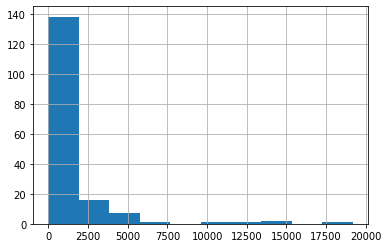

In [38]:
# histograma
br[variavel].hist();

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


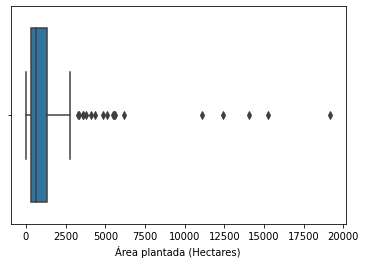

In [39]:
# boxplot
sns.boxplot(br[variavel], orient='v');

In [44]:
# visualizar os municípios em ordem decrescente (ou crescente)
br.sort_values(variavel, ascending=False)[['Município', variavel]].head(10)

,Município,Área plantada (Hectares)
13,Baía Formosa (RN),19180
24,Canguaretama (RN),15240
87,Mossoró (RN),14050
145,Serra do Mel (RN),12420
14,Baraúna (RN),11100
46,Goianinha (RN),6210
29,Cerro Corá (RN),5610
113,Pureza (RN),5549
158,Touros (RN),5481
11,Arês (RN),5110


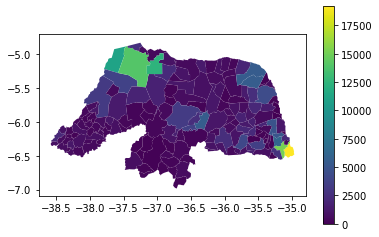

In [45]:
# mapa temático - simples
br.plot(variavel, legend=True);

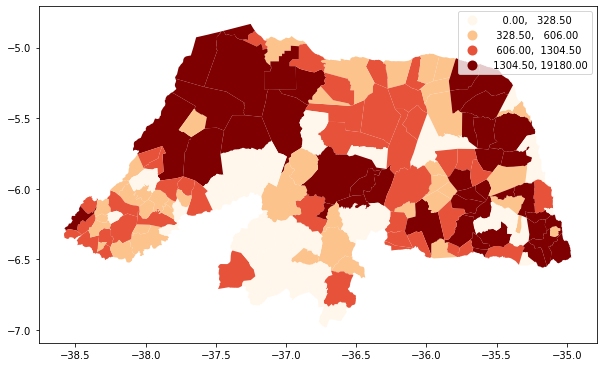

In [46]:
# mapa temático - quantiles
br.plot(column=variavel, figsize=(10, 10), scheme='Quantiles', cmap='OrRd', legend=True, k=4);

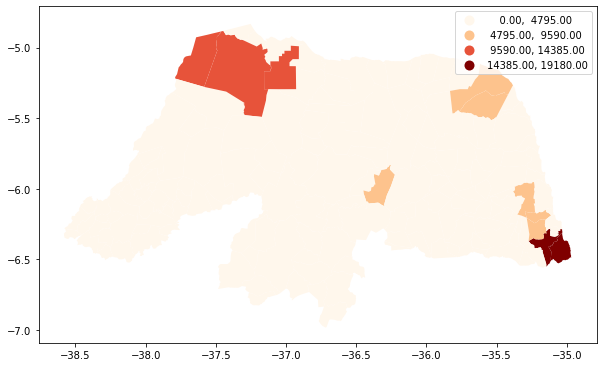

In [47]:
# mapa temático - equal_interval
br.plot(column=variavel, figsize=(10, 10), scheme='Equal_Interval', cmap='OrRd', legend=True, k=4);

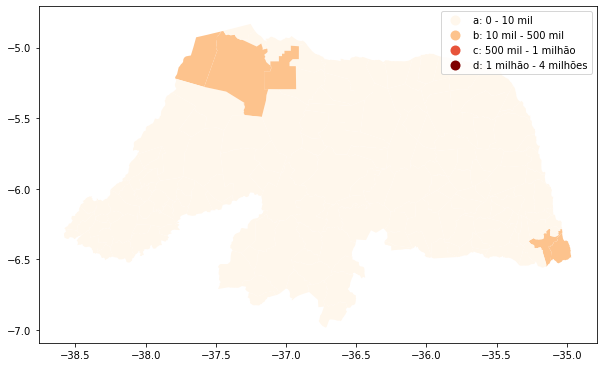

In [48]:
# intervalos de valores definidos pelo usuário
referencia = [10000, 500000, 1000000, 4000000]     # valores de referência considera 'abaixo que'
labels = ['a: 0 - 10 mil', 'b: 10 mil - 500 mil', 'c: 500 mil - 1 milhão', 'd: 1 milhão - 4 milhões']  # letras por causa de ordenação alfabética
valores = br[variavel]
quantis = mc.UserDefined(valores, referencia)
cl = [labels[i] for i in quantis.yb]
df = br.assign(cl=cl)
df.cl = pd.Categorical(df.cl, ordered=True, categories=labels)
df.plot(column='cl', figsize=(10, 10), cmap='OrRd', legend=True);

In [49]:
# obter matriz de vizinhança no formato queen
w = Queen.from_dataframe(br)
w.transform = 'r'
# calcular I de Moran global para a variável escolhida
y = br[variavel].values
moran = Moran(y, w)
moran.I

0.4502484931231639

In [50]:
br.shape

(167, 7)

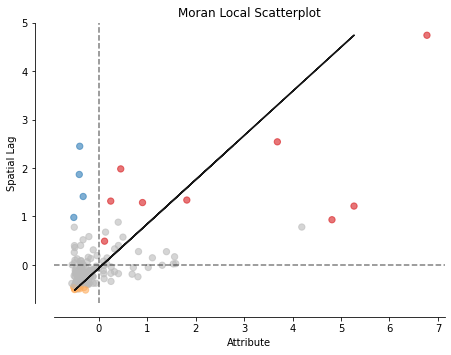

In [52]:
# só o diagrama de dispersão
moran_loc = Moran_Local(y, w)
moran_scatterplot(moran_loc, p=0.05);

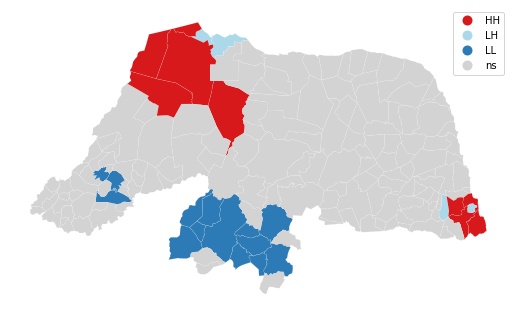

In [53]:
# mapa LISA
lisa_cluster(moran_loc, br, p=0.05, figsize = (9,9));

Escolher um municipio
